# Libraries for Neural Networks - PyTorch



## Import Libraries

Installs a specific PyTorch version

In [1]:
%%capture
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

In [ ]:
import torch
from sklearn.model_selection import train_test_split
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import torch.nn as nn
torch.__version__

## Loading the dataset
The data set contains a table with 30 features for 569 subjects

In [ ]:
breast = datasets.load_breast_cancer()
breast.data.shape

Let's take a look at what the data looks like

In [ ]:
breast.data

This is how the header of the columns (the names of the features) looks like.

In [ ]:
breast.feature_names

And this is how the labeling of the data can be displayed. As you can see the labeling is binary.

In [ ]:
breast.target

According to the labeling: 0 - malignant (גידול ממאיר) and 1 - benign (גידול שפיר).

In [ ]:
breast.target_names

## Data Preprocessing

### Splitting the dataset into the Training set and Test set

We will split the data into features and labeling (X,y)

In [28]:
X = breast.data
y = breast.target

We will separate the training set from the test set

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

### Data transformation


When we use Pytorch we will have to work with a different type of data structure and not a Numpy array

In [ ]:
type(X_train)

Therefore, we will convert the data structure type to PyTorch Tensor

In [33]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.float)

In [ ]:
type(X_train)

Now we will use Tensor Dataset to connect the features and labeling and create a complete dataset. And now we can work with this data in PyTorch neural networks.

In [35]:
dataset = torch.utils.data.TensorDataset(X_train, y_train)

In [ ]:
type(dataset)

Now we will use Data loader. It will combines a dataset and a sampler, and provides an iterable over the given dataset (also divides the data into batches(.

In [37]:
train_loader = torch.utils.data.DataLoader(dataset, batch_size=10)

## Neural network structure
30 -> 16 -> 16 -> 1

In [38]:
network = nn.Sequential(nn.Linear(in_features=30, out_features=16),
                        nn.Sigmoid(),
                        nn.Linear(16, 16),
                        nn.Sigmoid(),
                        nn.Linear(16, 1),
                        nn.Sigmoid())

Network summary

In [ ]:
network.parameters

Now we will create a Loss function (binary cross entropy) and optimizer

In [40]:
loss_function = nn.BCELoss()

In [41]:
optimizer = torch.optim.Adam(network.parameters(), lr = 0.001)

## Training the neural network on the Training se

In [42]:
epochs = 100
avg_loss = 0
loss_list, epochs_list = [], []

In [ ]:
for epoch in range(epochs):
  running_loss = 0.

  for data in train_loader:
    batch_features, batch_labels = data
    optimizer.zero_grad()

    predictions = network.forward(batch_features) 
    loss = loss_function(predictions, batch_labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
  if running_loss != 0:
    avg_loss = running_loss / len(train_loader)

  loss_list.append(avg_loss)
  epochs_list.append(epoch)

  print('Epoch: ' + str(epoch + 1) + ' loss: ' + str(avg_loss))

### Loss Visualization


In [ ]:
plt.plot(epochs_list,loss_list, label="Training Loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

## Evaluate

We use `eval()` to set network's layers to evaluation mode before running inference.<br>
If we wish to resuming training, we can call `network.train()` to set these layers to training mode.

In [ ]:
network.eval()

Data transformation for the test set

In [ ]:
type(X_test)

In [ ]:
X_test = torch.tensor(X_test, dtype=torch.float)
type(X_test)

### Test model performance

As we can see the model returned us a list with probabilities

In [ ]:
predictions = network.forward(X_test)
predictions[:5]

We will replace the list of probabilities with a list of booleans. For the sake of this matter, we will use a threshold of 0.5

In [ ]:
predictions = np.array(predictions > 0.5)
predictions[:5]

In [ ]:
y_test[:5]

In [ ]:
accuracy_score(y_test, predictions)

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm

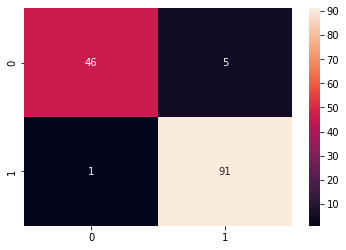

In [54]:
import seaborn as sns
sns.heatmap(cm, annot=True)